In [ ]:
# 24 May 2025

<h1 style="line-height:3rem;"> Earthquake</h1>

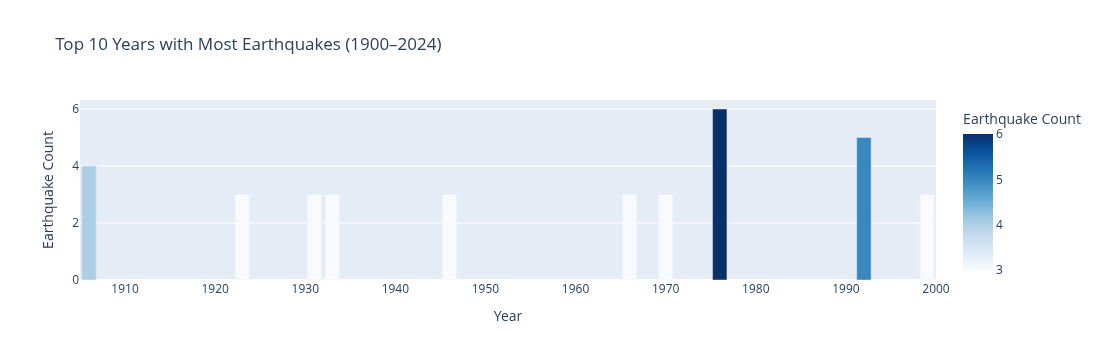

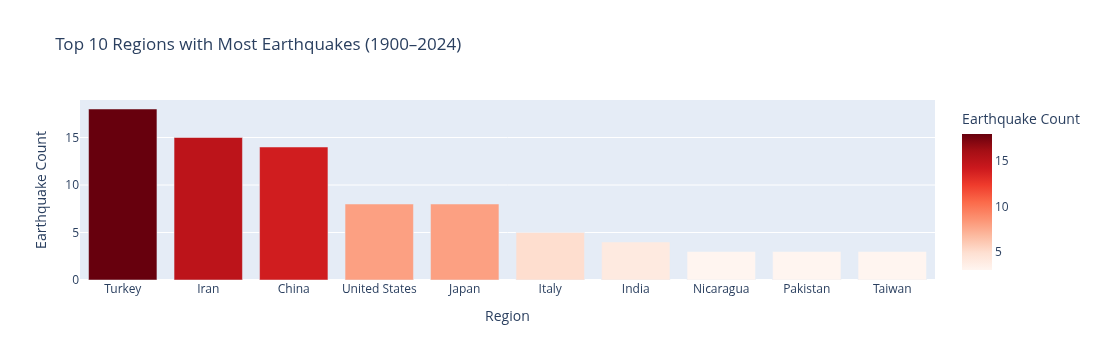

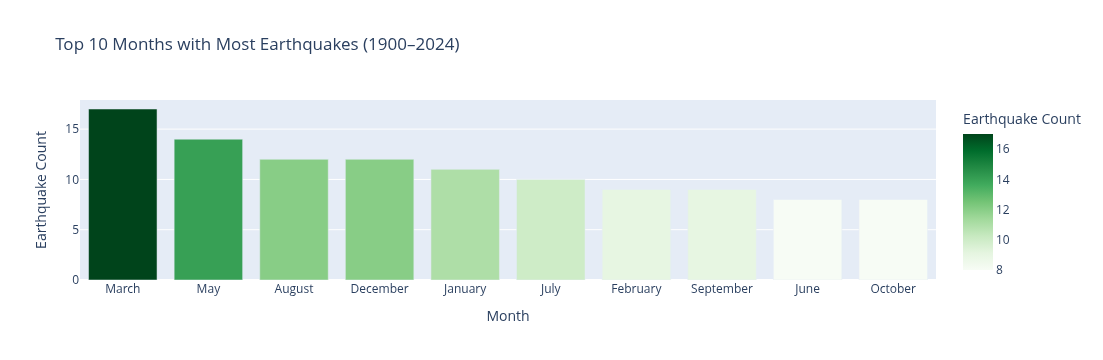

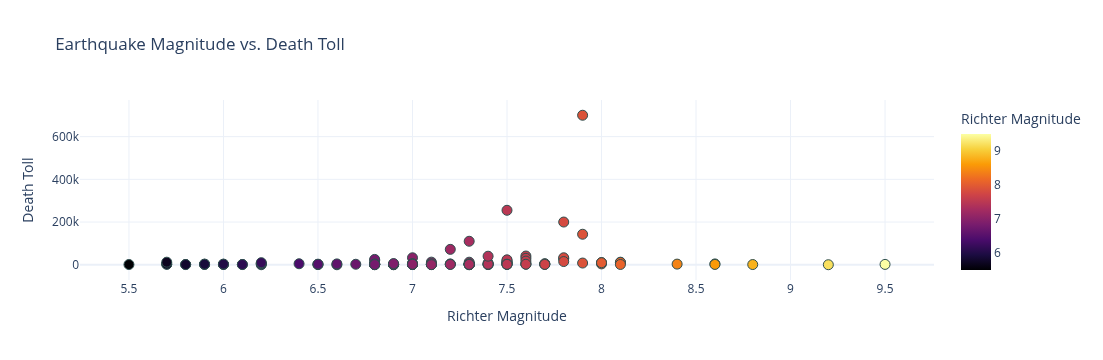

,Month,Earthquake Count
0,March,17
1,May,14
2,August,12
3,December,12
4,January,11
5,July,10
6,February,9
7,September,9
8,June,8
9,October,8


In [37]:
import pandas as pd
import plotly.express as px

import numpy as np
import os 

cwd = os.getcwd() 
env_name = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', 'Localhost')


if(env_name == "Localhost"):
    df = pd.read_csv('../datasets/New/Earthquake.csv')
else: 
    df = pd.read_csv("/kaggle/input/sports-football-1872-2025/Sports_Football_1872_2025.csv")




# Load the dataset globally

def most_earthquakes_info(start_year=1920, end_year=2024, top_n=5):
    """
    Analyze and visualize top N years, regions, and months with most earthquakes.
    
    Parameters:
        start_year (int): Start year (inclusive).
        end_year (int): End year (inclusive).
        top_n (int): Number of top entries to return.
    
    Returns:
        tuple: Styled DataFrames for years, regions, and months.
    """
    # Filter data and make a copy to avoid SettingWithCopyWarning
    df_filtered = df[(df['year'] >= start_year) & (df['year'] <= end_year)].copy()

    if df_filtered.empty:
        print(f"No earthquake data available between {start_year} and {end_year}.")
        return None, None, None

    # --- Top Years ---
    top_years = df_filtered['year'].value_counts().nlargest(top_n).reset_index()
    top_years.columns = ['Year', 'Earthquake Count']
    styled_years = top_years.style.background_gradient(cmap='Blues')

    # --- Top Regions ---
    top_regions = df_filtered['region'].value_counts().nlargest(top_n).reset_index()
    top_regions.columns = ['Region', 'Earthquake Count']
    styled_regions = top_regions.style.background_gradient(cmap='Reds')

    # --- Top Months ---
    month_order = [
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ]
    df_filtered['month'] = pd.Categorical(df_filtered['month'], categories=month_order, ordered=True)
    top_months = df_filtered['month'].value_counts().loc[month_order].dropna().nlargest(top_n).reset_index()
    top_months.columns = ['Month', 'Earthquake Count']
    styled_months = top_months.style.background_gradient(cmap='Greens')

    # --- Bar Charts ---
    fig_years = px.bar(
        top_years,
        x='Year',
        y='Earthquake Count',
        color='Earthquake Count',
        color_continuous_scale='Blues',
        title=f"Top {top_n} Years with Most Earthquakes ({start_year}–{end_year})"
    )
    fig_years.show()

    fig_regions = px.bar(
        top_regions,
        x='Region',
        y='Earthquake Count',
        color='Earthquake Count',
        color_continuous_scale='Reds',
        title=f"Top {top_n} Regions with Most Earthquakes ({start_year}–{end_year})"
    )
    fig_regions.show()

    fig_months = px.bar(
        top_months,
        x='Month',
        y='Earthquake Count',
        color='Earthquake Count',
        color_continuous_scale='Greens',
        title=f"Top {top_n} Months with Most Earthquakes ({start_year}–{end_year})"
    )
    fig_months.show()

    #
    df_plot = df[['richter', 'deaths']].dropna()
    df_plot['richter'] = pd.to_numeric(df_plot['richter'], errors='coerce')
    df_plot['deaths'] = pd.to_numeric(df_plot['deaths'], errors='coerce')
    df_plot = df_plot.dropna()
    
    # Create scatter plot
    fig = px.scatter(
        df_plot,
        x='richter',
        y='deaths',
        title='Earthquake Magnitude vs. Death Toll',
        labels={'richter': 'Richter Magnitude', 'deaths': 'Death Toll'},
        hover_data=['richter', 'deaths'],
        color='richter',  # optional gradient coloring by magnitude
        color_continuous_scale='Inferno'
    )
    
    fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))
    fig.update_layout(template='plotly_white')
    fig.show()

    return styled_years, styled_regions, styled_months

# Example usage
styled_years, styled_regions, styled_months = most_earthquakes_info(start_year=1900, end_year=2024, top_n=10)

# These styled tables will render automatically in notebooks
styled_years
styled_regions
styled_months
